# Arithmetic Operations on Images

In this notebook we are going to be covering arithmetic operations which include:
1. addition and subtraction
2. multiplication

Specifically we will look at how we can adjust the brightness of an image using addition and subtraction and demonstrate how we can adjust the contrast of an image using multiplication.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

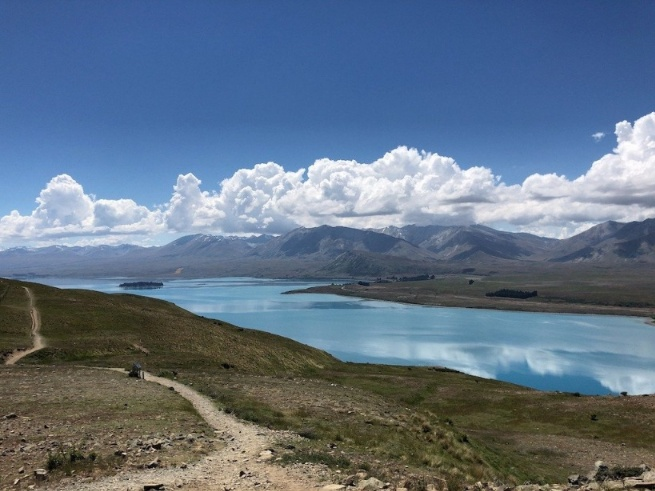

In [2]:
image = 'new-zealand-lake.jpg'
img = cv2.imread(image, cv2.IMREAD_COLOR)

# Display the image
Image(filename=image, width=400)

## Adjust the brightness of an image

These two functions (add and subtract) has two required arguments:

1. **src1**: First input array or a scalar.
2. **src2**: Second input array of or a scalar the same size and the same type as src1.

Also these two functions has two optional arguments:

1. **mask**: Optional argument mask - 8-bit single channel array, that specifies elements of the output to be changed.
2. **dtype**: Optional depth of the output array.

---

The darker image contain pixel values that are 30 units lower than the original image in all three channels. The same with the brighter image, but is upper.

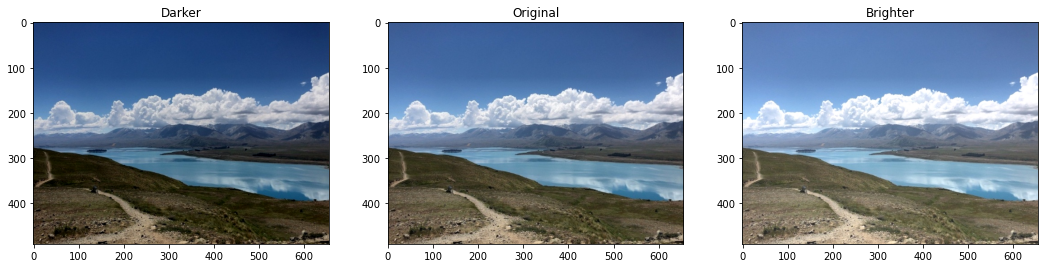

In [3]:
# Create a matrix with constant intensity.
matrix = np.ones(img.shape, dtype='uint8') * 30

# Create brighter and darker images.
img_brighter = cv2.add(img, matrix)
img_darker = cv2.subtract(img, matrix)

# Display the images.
plt.figure(figsize=(18, 5))
plt.subplot(131); plt.imshow(img_darker[:, :, ::-1]); plt.title('Darker')
plt.subplot(132); plt.imshow(img[:, :, ::-1]); plt.title('Original')
plt.subplot(133); plt.imshow(img_brighter[:, :, ::-1]); plt.title('Brighter');

# 2. Multiplication: Changes the Image Contrast

+ Multiplying an image by a constant value will change the contrast to that image.

In OpenCV ther is a **multiply** function and it's got a similar syntax to add and subtract functions.

For the **multiply** function there is two required arguments which are the two images we are going to multiply, and there is some optional arguments.

### Modify the image contrast

The clip function from numpy allows us to clip the contents of an array based on a min and max value

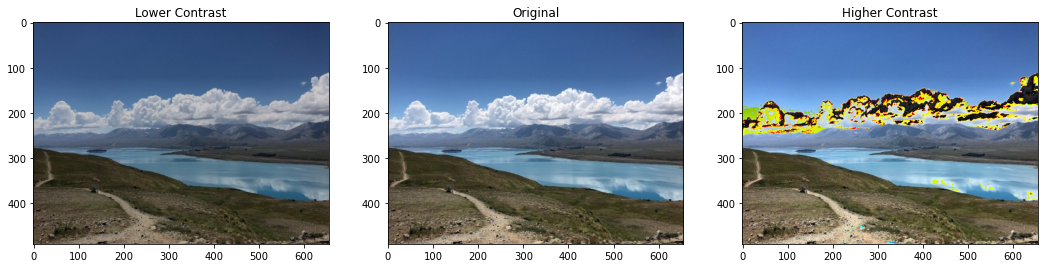

In [4]:
# Create matrices with a constant scale factor.
matrix1 = np.ones(img.shape) * 0.8
matrix2 = np.ones(img.shape) * 1.2

# Create lower and higher contrast iamges.
img_lower = np.uint8(cv2.multiply(np.float64(img), matrix1))
img_higher = np.uint8(cv2.multiply(np.float64(img), matrix2))

# Display the images.
plt.figure(figsize=(18, 5))
plt.subplot(131); plt.imshow(img_lower[:, :, ::-1]); plt.title('Lower Contrast')
plt.subplot(132); plt.imshow(img[:, :, ::-1]); plt.title('Original')
plt.subplot(133); plt.imshow(img_higher[:, :, ::-1]); plt.title('Higher Contrast');

# Handling Overflow using **np.clip()**

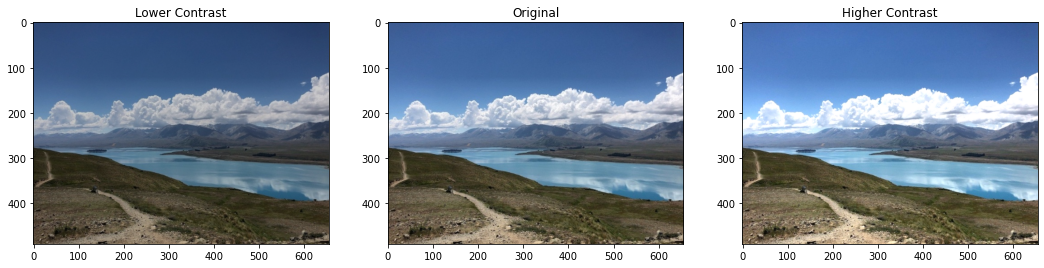

In [5]:
# Create matrices with a constant scale factor.
matrix1 = np.ones(img.shape) * 0.8
matrix2 = np.ones(img.shape) * 1.2

# Create lower and higher contrast images.
img_lower = np.uint8(cv2.multiply(np.float64(img), matrix1))
img_higher = np.uint8(np.clip(cv2.multiply(np.float64(img), matrix2), 0, 255))

# Display the images.
plt.figure(figsize=(18, 5))
plt.subplot(131); plt.imshow(img_lower[:, :, ::-1]); plt.title('Lower Contrast')
plt.subplot(132); plt.imshow(img[:, :, ::-1]); plt.title('Original')
plt.subplot(133); plt.imshow(img_higher[:, :, ::-1]); plt.title('Higher Contrast');

## Using the scale option

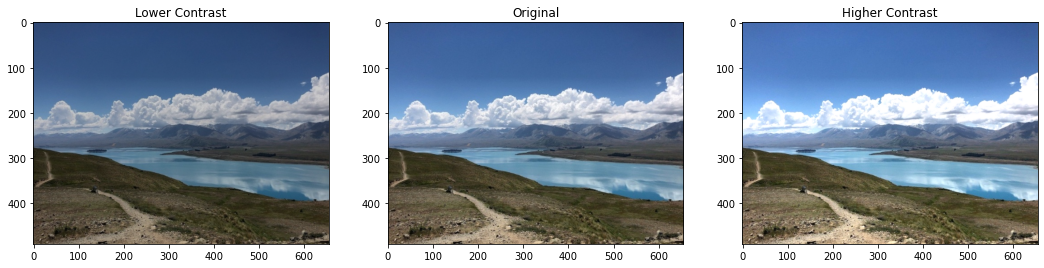

In [9]:
# Create matrices with a constant scale factor.
matrix_ones = np.ones(img.shape, dtype='float64')

# Create lower and higher contrast images.
img_lower = np.uint8(cv2.multiply(np.float64(img), matrix_ones, scale=.8))
img_higher = np.uint8(np.clip(cv2.multiply(np.float64(img), matrix_ones, scale=1.2), 0, 255))

# Display the images.
plt.figure(figsize=(18, 5))
plt.subplot(131); plt.imshow(img_lower[:, :, ::-1]); plt.title('Lower Contrast')
plt.subplot(132); plt.imshow(img[:, :, ::-1]); plt.title('Original')
plt.subplot(133); plt.imshow(img_higher[:, :, ::-1]); plt.title('Higher Contrast');

# Excercise

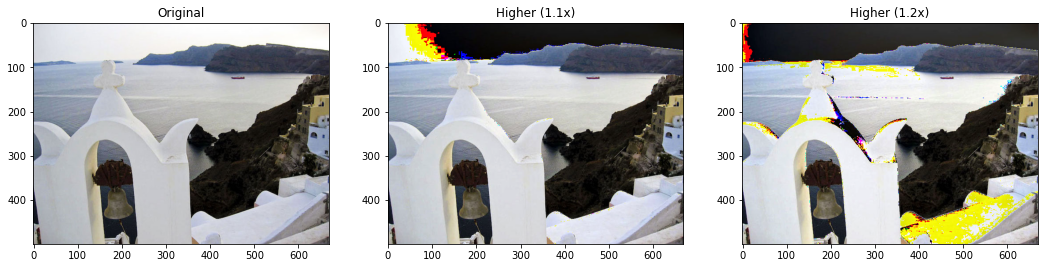

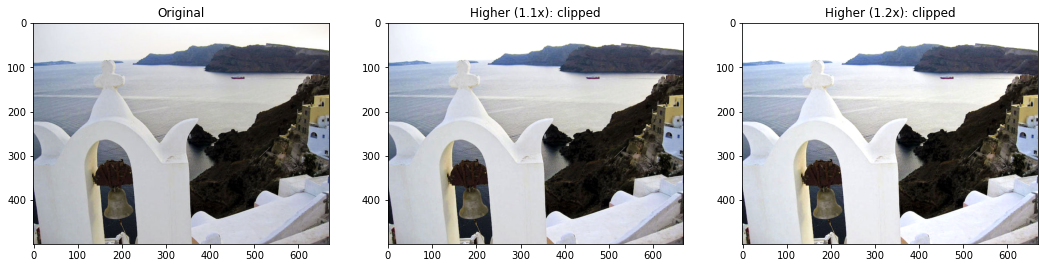

In [13]:
# Read the image ('Santorini.jpg')
image = 'Santorini.jpg'
img = cv2.imread(image, cv2.IMREAD_COLOR)

# Create a matrix of ones (with data type float64)
matrix_ones = np.ones(img.shape, dtype='float64')

# Create two higher contrast images using the 'scale' option with factors of 1.1 and 1.2 (without overflow fix)
# YOUR CODE HERE
img_higher1  = np.uint8(cv2.multiply(np.float64(img), matrix_ones, scale=1.1))
img_higher2  = np.uint8(cv2.multiply(np.float64(img), matrix_ones, scale=1.2))

# Display the images (original, higher (1.1x) , high (1.2x))
# UNCOMMENT the lines below.
plt.figure(figsize=[18,5])
plt.subplot(131); plt.imshow(img[:, :, ::-1]);         plt.title('Original')
plt.subplot(132); plt.imshow(img_higher1[:, :, ::-1]); plt.title('Higher (1.1x)')
plt.subplot(133); plt.imshow(img_higher2[:, :, ::-1]); plt.title('Higher (1.2x)');

# Create higher contrast images using scale factors of 1.1 and 1.2 (using np.clip() to clip high values to 255)
# YOUR CODE HERE
img_higher1  = np.uint8(np.clip(cv2.multiply(np.float64(img), matrix_ones, scale=1.1), 0, 255))
img_higher2  = np.uint8(np.clip(cv2.multiply(np.float64(img), matrix_ones, scale=1.2), 0, 255))

# Display the images (original, higher (1.1x) clipped , high (1.2x) clipped)
# UNCOMMENT the lines below.
plt.figure(figsize = [18,5])
plt.subplot(131); plt.imshow(img[:, :, ::-1]);         plt.title('Original')
plt.subplot(132); plt.imshow(img_higher1[:, :, ::-1]); plt.title('Higher (1.1x): clipped')
plt.subplot(133); plt.imshow(img_higher2[:, :, ::-1]); plt.title('Higher (1.2x): clipped');